<a href="https://colab.research.google.com/github/blhuillier/2025B_AstroDataAnalysis/blob/main/Notebooks/Chap_6_hypothesis_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem I (Feigelson & Babu 7.10.1)

Let's test the QSO data for correlation.

1. Download the data from https://astrostatistics.psu.edu/MSMA/datasets/SDSS_QSO.dat. Consider only data with  $18<𝑖<22$. Remove the outlier points.

2. Estimate the Pearson correlation coefficient.

3. Apply the correlation test to the $i$- and $z$-band. What is the p-value? Are the data correlated? Is it consistent with your expectation?

4. Randomly select 10 points. Redo the analysis. How do the results change?

# Problem II.

We want to see whether we can distinguish between distributions. Le'ts start with the Normal and the Student distributions. For large $M$, $t_M\rightarrow {N}(0,1)$.

1. Generate two samples $X_1$ and $X_2$ of size $N_1$ and $N_2$, where $X_1\sim  N(0,1)$ and $X_2 \sim  t_{N_2}$ and $X_3\sim t_{N_3}$, with $N_2=3, N_3=100$.

2. Plot the three theoretical distributions and overplot the histograms of $X_1$, $X_2$, and $X_3$

3. Plot the Empirical Cumulative Distribution Functions of the three samples.

4. Plot the Q-Q diagram of ($X_1$,$ {N}(0,1)$), ($X_2$, $t_{N_2}$),  ($X_3$, $t_{N_3}$).
Plot the Q-Q diagrams of    $(X_1,X_2)$ and $(X_1,X_3)$ . What can you say about the two pairs of distribution?

5. Let's use the Kolmogorov-Smirnov test to see if $X_1$ is consistent with ${N}(0,1)$.
Can $X_1$ have been drawn from a $ N(0.1,\sqrt{2})$?
 Same with $X_2$ and $X_3$.
 Apply the 2-samples KS test to $X_1,X_2$ and $(X_1,X_3)$ to decide whether the samples can have been drawn from the same distributions.

6. Let's apply the Anderson-Darling test. First test whether $X_1$ and $X_2$ can be drawn from a ${N}(0,1)$



In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


# I check the rcParams to obtain Matplotlib default list of colors:
#  print (plt.rcParams)

mycols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

Text(0, 0.5, '$f(x)$')

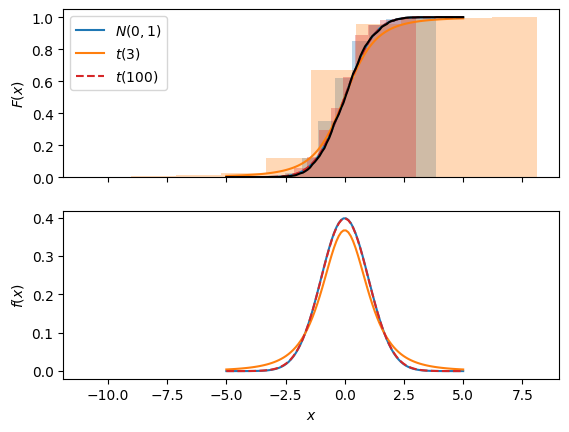

In [45]:


# initialize the seed:
r = np.random.RandomState(42)

N1 = 1000
N2 = 500
N3 = 200

M2 = 3
M3 = 100

# define the samples
X1 = r.normal(size=N1)
X2 = r.standard_t(df=M2, size=N2)
X3 = r.standard_t(df=M3, size=N3)

# define the theoretical distributions:
dist1 = stats.norm(0,1)
dist2 = stats.t(M2)
dist3 = stats.t(M3)


x0 = np.linspace(-5,5,100)
fig,ax = plt.subplots(2,1,sharex=True)

# cdf:
iax = ax[0]
iax.plot(x0, dist1.cdf(x0), label='$N(0,1)$')
iax.plot(x0, dist2.cdf(x0), label='$t(3)$')
iax.plot([],[])
iax.plot(x0, dist3.cdf(x0), label='$t(100)$', ls='--')
iax.set_ylabel("$F(x)$")
iax.legend()
iax.hist(X1, cumulative=True, density=True, color=mycols[0], alpha=.3)
iax.hist(X2, cumulative=True, density=True, color=mycols[1], alpha=.3)
iax.hist(X3, cumulative=True, density=True, color=mycols[3], alpha=.3)
iax.plot(x0, Fn(X1, x0), color='k')

# pdf:
iax = ax[1]
iax.plot(x0, dist1.pdf(x0), label='$N(0,1)$')
iax.plot(x0, dist2.pdf(x0), label='$t(3)$')
iax.plot([],[])
iax.plot(x0, dist3.pdf(x0), label='$t(100)$', ls='--')




iax.set_xlabel("$x$")
iax.set_ylabel("$f(x)$")


In [46]:
# 1-sample KS test:

# H0: X1 is drawn from N(0,1).

alpha = 0.05


def Fn(XX, x0):
  """ Returns the empirical CDF of XX"""
  NN = len(XX)
  ECDF = np.zeros(len(x0))
  for ii, xx in enumerate(x0):
    ECDF[ii] = (XX<xx).sum()
  return ECDF / NN

def get_Dn(XX, dist0, x0):
  '''
  XX: sample of size N,
  dist0: scipy.stat theoretical distribution
  x0: array of values
  '''

  D_n = max(np.abs(Fn(XX, x0) - dist0.cdf(x0)))

  return D_n


K_one_minus_alpha = stats.ksone(len(X1)).ppf(1-alpha)
print (f"K_{{1-alpha}} = {K_one_minus_alpha}")

print (get_Dn(X1, dist1, x0))


K_{1-alpha} = 0.038533841268045536
0.014284521403191863


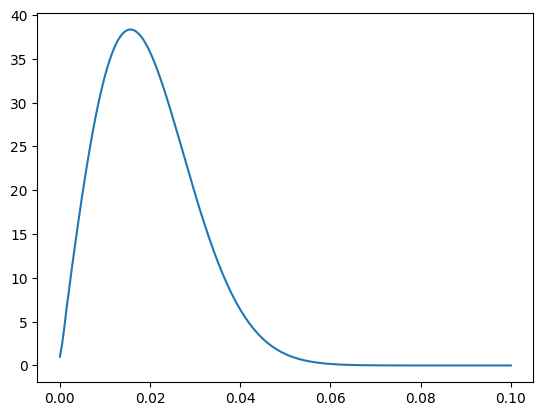

In [47]:
fig, ax = plt.subplots(1)

x1 = np.linspace(0,0.1,num=201)
ax.plot(x1, stats.ksone(N1).pdf(x1))

In [48]:
? stats.stats.ks_1samp

In [52]:
kstest = stats.ks_1samp(X1, dist1.cdf)
print (kstest)

KstestResult(statistic=np.float64(0.017327787320720822), pvalue=np.float64(0.9196626608357358), statistic_location=np.float64(-0.07444591576616721), statistic_sign=np.int8(-1))


In [53]:
# can X1 ~ N(0.1, sqrt{2}) ?

dist3 = stats.norm(0.1, np.sqrt(2))
kstest = stats.ks_1samp(X1, dist3.cdf)
print (kstest)



KstestResult(statistic=np.float64(0.11446086007120948), pvalue=np.float64(7.199546362850132e-12), statistic_location=np.float64(0.8724573282801447), statistic_sign=np.int8(1))


In [56]:
# can X1 and X2 be drawn from the same parent distribution?
# KS 2-samples:

kstest = stats.ks_2samp(X1, X2)
print(kstest)

# p-value = 0.0988 > alpha: cannot reject.



KstestResult(statistic=np.float64(0.067), pvalue=np.float64(0.09880187045466735), statistic_location=np.float64(-1.7171974435171258), statistic_sign=np.int8(-1))


# Problem III (Feigelson & Babu 5.9)

Read the Milky Way and M31 globular cluster data from
https://astrostatistics.psu.edu/MSMA/datasets/GlobClus_MWG.dat

https://astrostatistics.psu.edu/MSMA/datasets/GlobClus_M31.dat M31 is furhter, therefore the apparent magnitude is fainter. Let's apply a correction for the distance:  𝐾M31=𝐾M31−24.90 .

What are the mean and standard deviations of the samples?

Plot the empirical distribution functions of both samples on the same plot

We want to test whether both distributions can be drawn from a Gaussian Distribution. Please note that here, the Kolmogorov-Smirnov test is not correct: we cannot apply the KS test when we estimate the parameter of the distribution from the data.

Plot the Q-Q plot for MW and M31, and Q-Q plot for each of them and a Gaussian distribution. Do they seem to be drawn from a Gaussian distribution? from the same distribution?